In [1]:
#Application of different Crossvalidation methods

In [53]:
import seaborn as sns

In [11]:
import pandas as pd
df=pd.read_csv('breast-cancer_recurr.csv')


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


In [54]:
df_viz=pd.read_csv('breast-cancer_recurr.csv')

/home/sunit.kapuria/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


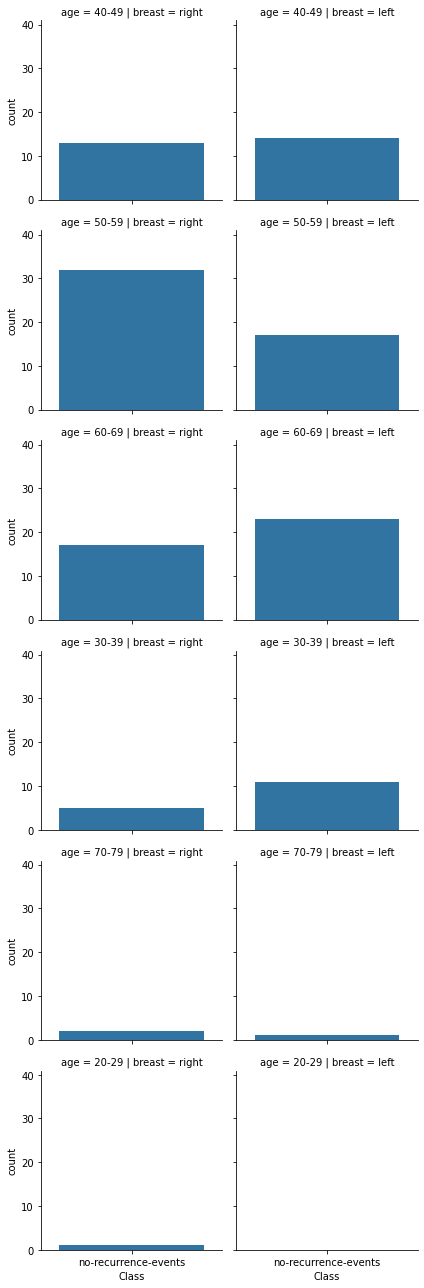

In [66]:
g = sns.FacetGrid(df_viz, col="breast",  row="age")
g.map(sns.countplot, "Class")

<AxesSubplot:xlabel='breast', ylabel='count'>

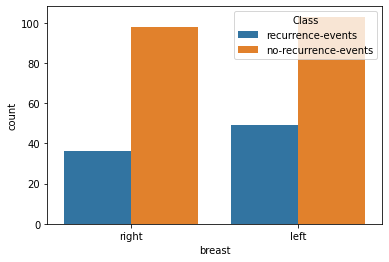

In [55]:
sns.countplot(x='breast', hue='Class', data=df_viz )

<AxesSubplot:xlabel='age', ylabel='count'>

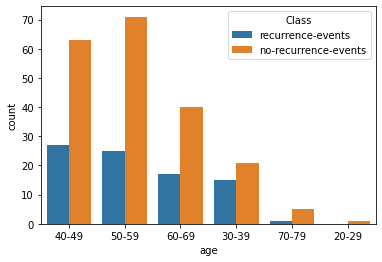

In [58]:
sns.countplot(x='age', hue='Class', data=df_viz )

/home/sunit.kapuria/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


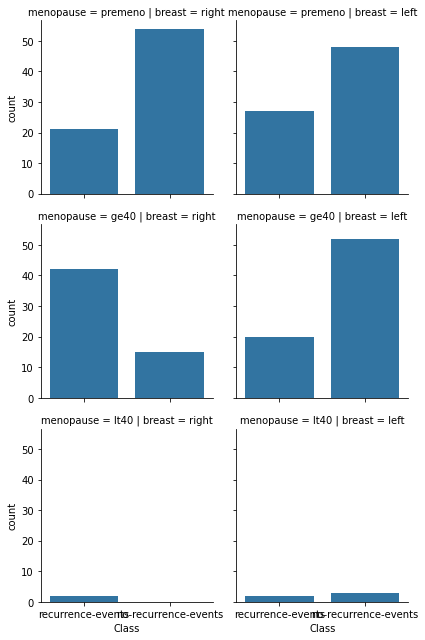

In [57]:
g = sns.FacetGrid(df_viz, col="breast",  row="menopause")
g.map(sns.countplot, "Class")

In [13]:
d={'no-recurrence-events':0, 'recurrence-events':1 }

In [14]:
df['Class']=df['Class'].map(d)

In [17]:
df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,1.0,3,right,left_up,no,1
1,50-59,ge40,15-19,0-2,0.0,1,right,central,no,0
2,50-59,ge40,35-39,0-2,0.0,2,left,left_low,no,1
3,40-49,premeno,35-39,0-2,1.0,3,right,left_low,yes,0
4,40-49,premeno,30-34,3-5,1.0,2,left,right_up,no,1


In [16]:
d={'no':0, 'yes':1 }
df['node-caps']=df['node-caps'].map(d)

In [18]:
d={'right':0, 'left':1 }
df['breast']=df['breast'].map(d)

In [19]:
df['menopause'].unique()

array(['premeno', 'ge40', 'lt40'], dtype=object)

In [20]:
df['age'].unique()

array(['40-49', '50-59', '60-69', '30-39', '70-79', '20-29'], dtype=object)

In [30]:
df['inv-nodes'].unique()

array(['0-2', '3-5', '15-17', '6-8', '9-11', '24-26', '12-14'],
      dtype=object)

In [21]:
df['tumor-size'].unique()

array(['15-19', '35-39', '30-34', '25-29', '40-44', '10-14', '0-4',
       '20-24', '45-49', '50-54', '5-9'], dtype=object)

In [22]:
df['breast-quad'].unique()

array(['left_up', 'central', 'left_low', 'right_up', 'right_low', nan],
      dtype=object)

In [23]:
df['irradiat'].unique()

array(['no', 'yes'], dtype=object)

In [24]:
d={'no':0, 'yes':1 }
df['irradiat']=df['irradiat'].map(d)

In [25]:
menopause=pd.get_dummies(df['menopause'], drop_first=True)
df=pd.concat([df,menopause], axis=1)
df

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class,lt40,premeno
0,40-49,premeno,15-19,0-2,1.0,3,0,left_up,0,1,0,1
1,50-59,ge40,15-19,0-2,0.0,1,0,central,0,0,0,0
2,50-59,ge40,35-39,0-2,0.0,2,1,left_low,0,1,0,0
3,40-49,premeno,35-39,0-2,1.0,3,0,left_low,1,0,0,1
4,40-49,premeno,30-34,3-5,1.0,2,1,right_up,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
281,50-59,ge40,30-34,6-8,1.0,2,1,left_low,0,0,0,0
282,50-59,premeno,25-29,3-5,1.0,2,1,left_low,1,0,0,1
283,30-39,premeno,30-34,6-8,1.0,2,0,right_up,0,0,0,1
284,50-59,premeno,15-19,0-2,0.0,2,0,left_low,0,0,0,1


In [26]:
breast=pd.get_dummies(df['breast-quad'], drop_first=True)
df=pd.concat([df,breast], axis=1)
df

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class,lt40,premeno,left_low,left_up,right_low,right_up
0,40-49,premeno,15-19,0-2,1.0,3,0,left_up,0,1,0,1,0,1,0,0
1,50-59,ge40,15-19,0-2,0.0,1,0,central,0,0,0,0,0,0,0,0
2,50-59,ge40,35-39,0-2,0.0,2,1,left_low,0,1,0,0,1,0,0,0
3,40-49,premeno,35-39,0-2,1.0,3,0,left_low,1,0,0,1,1,0,0,0
4,40-49,premeno,30-34,3-5,1.0,2,1,right_up,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,50-59,ge40,30-34,6-8,1.0,2,1,left_low,0,0,0,0,1,0,0,0
282,50-59,premeno,25-29,3-5,1.0,2,1,left_low,1,0,0,1,1,0,0,0
283,30-39,premeno,30-34,6-8,1.0,2,0,right_up,0,0,0,1,0,0,0,1
284,50-59,premeno,15-19,0-2,0.0,2,0,left_low,0,0,0,1,1,0,0,0


In [27]:
age=pd.get_dummies(df['age'], drop_first=True)
df=pd.concat([df,age], axis=1)
df

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class,...,premeno,left_low,left_up,right_low,right_up,30-39,40-49,50-59,60-69,70-79
0,40-49,premeno,15-19,0-2,1.0,3,0,left_up,0,1,...,1,0,1,0,0,0,1,0,0,0
1,50-59,ge40,15-19,0-2,0.0,1,0,central,0,0,...,0,0,0,0,0,0,0,1,0,0
2,50-59,ge40,35-39,0-2,0.0,2,1,left_low,0,1,...,0,1,0,0,0,0,0,1,0,0
3,40-49,premeno,35-39,0-2,1.0,3,0,left_low,1,0,...,1,1,0,0,0,0,1,0,0,0
4,40-49,premeno,30-34,3-5,1.0,2,1,right_up,0,1,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,50-59,ge40,30-34,6-8,1.0,2,1,left_low,0,0,...,0,1,0,0,0,0,0,1,0,0
282,50-59,premeno,25-29,3-5,1.0,2,1,left_low,1,0,...,1,1,0,0,0,0,0,1,0,0
283,30-39,premeno,30-34,6-8,1.0,2,0,right_up,0,0,...,1,0,0,0,1,1,0,0,0,0
284,50-59,premeno,15-19,0-2,0.0,2,0,left_low,0,0,...,1,1,0,0,0,0,0,1,0,0


In [29]:
tumor=pd.get_dummies(df['tumor-size'], drop_first=True)
df=pd.concat([df,tumor], axis=1)
df

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class,...,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,5-9,50-54
0,40-49,premeno,15-19,0-2,1.0,3,0,left_up,0,1,...,0,1,0,0,0,0,0,0,0,0
1,50-59,ge40,15-19,0-2,0.0,1,0,central,0,0,...,0,1,0,0,0,0,0,0,0,0
2,50-59,ge40,35-39,0-2,0.0,2,1,left_low,0,1,...,0,0,0,0,0,1,0,0,0,0
3,40-49,premeno,35-39,0-2,1.0,3,0,left_low,1,0,...,0,0,0,0,0,1,0,0,0,0
4,40-49,premeno,30-34,3-5,1.0,2,1,right_up,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,50-59,ge40,30-34,6-8,1.0,2,1,left_low,0,0,...,0,0,0,0,1,0,0,0,0,0
282,50-59,premeno,25-29,3-5,1.0,2,1,left_low,1,0,...,0,0,0,1,0,0,0,0,0,0
283,30-39,premeno,30-34,6-8,1.0,2,0,right_up,0,0,...,0,0,0,0,1,0,0,0,0,0
284,50-59,premeno,15-19,0-2,0.0,2,0,left_low,0,0,...,0,1,0,0,0,0,0,0,0,0


In [31]:
inv=pd.get_dummies(df['inv-nodes'], drop_first=True)
df=pd.concat([df,inv], axis=1)
df

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class,...,40-44,45-49,5-9,50-54,12-14,15-17,24-26,3-5,6-8,9-11
0,40-49,premeno,15-19,0-2,1.0,3,0,left_up,0,1,...,0,0,0,0,0,0,0,0,0,0
1,50-59,ge40,15-19,0-2,0.0,1,0,central,0,0,...,0,0,0,0,0,0,0,0,0,0
2,50-59,ge40,35-39,0-2,0.0,2,1,left_low,0,1,...,0,0,0,0,0,0,0,0,0,0
3,40-49,premeno,35-39,0-2,1.0,3,0,left_low,1,0,...,0,0,0,0,0,0,0,0,0,0
4,40-49,premeno,30-34,3-5,1.0,2,1,right_up,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,50-59,ge40,30-34,6-8,1.0,2,1,left_low,0,0,...,0,0,0,0,0,0,0,0,1,0
282,50-59,premeno,25-29,3-5,1.0,2,1,left_low,1,0,...,0,0,0,0,0,0,0,1,0,0
283,30-39,premeno,30-34,6-8,1.0,2,0,right_up,0,0,...,0,0,0,0,0,0,0,0,1,0
284,50-59,premeno,15-19,0-2,0.0,2,0,left_low,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df.drop(labels=['age', 'menopause', 'tumor-size', 'breast-quad', 'inv-nodes'], axis=1, inplace=True)

In [33]:
df.head()

,node-caps,deg-malig,breast,irradiat,Class,lt40,premeno,left_low,left_up,right_low,...,40-44,45-49,5-9,50-54,12-14,15-17,24-26,3-5,6-8,9-11
0,1.0,3,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,2,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,3,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,2,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   node-caps  278 non-null    float64
 1   deg-malig  286 non-null    int64  
 2   breast     286 non-null    int64  
 3   irradiat   286 non-null    int64  
 4   Class      286 non-null    int64  
 5   lt40       286 non-null    uint8  
 6   premeno    286 non-null    uint8  
 7   left_low   286 non-null    uint8  
 8   left_up    286 non-null    uint8  
 9   right_low  286 non-null    uint8  
 10  right_up   286 non-null    uint8  
 11  feature11  286 non-null    uint8  
 12  feature12  286 non-null    uint8  
 13  feature13  286 non-null    uint8  
 14  feature14  286 non-null    uint8  
 15  15         286 non-null    uint8  
 16  16         286 non-null    uint8  
 17  17         286 non-null    uint8  
 18  18         286 non-null    uint8  
 19  19         286 non-null    uint8  
 20  21        

In [45]:
df.columns=['node-caps', 'deg-malig', 'breast', 'irradiat', 'Class', 'lt40',
       'premeno', 'left_low', 'left_up', 'right_low', 'right_up', 'feature11',
       'feature12', 'feature13', 'feature14', '15', '16', '17', '18', '19',
       '21', '22', '23', '24', '25', '26', '27', '28',
       '29', '30', '31', '32']

In [49]:
df.isnull().sum()

node-caps    0
deg-malig    0
breast       0
irradiat     0
Class        0
lt40         0
premeno      0
left_low     0
left_up      0
right_low    0
right_up     0
feature11    0
feature12    0
feature13    0
feature14    0
15           0
16           0
17           0
18           0
19           0
21           0
22           0
23           0
24           0
25           0
26           0
27           0
28           0
29           0
30           0
31           0
32           0
dtype: int64

In [48]:
df.dropna(axis=0, inplace=True)

In [50]:
x=df.drop('Class', axis=1)
y=df['Class']

,node-caps,deg-malig,breast,irradiat,lt40,premeno,left_low,left_up,right_low,right_up,...,23,24,25,26,27,28,29,30,31,32
0,1.0,3,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,2,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,3,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,2,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,1.0,2,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
282,1.0,2,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
283,1.0,2,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
284,0.0,2,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
# it is possible that these features have mutually correlated values and therefore, we can perform various fetaure
#selection methods to remove unwanted feature.

# but this study is limited to cross-validation and we will directly move on with that for now.

In [69]:
df['Class'].value_counts()
#The dataset is slightly imbalanced so we can use random forest classifier here 
#as random forest performs very well with imbalanced dataset.
# otherwise we can also perform oversampling, or undersampling methods.

0    196
1     82
Name: Class, dtype: int64

In [70]:
#lets start with different CV and spliting methods

# 1. Hold out validation approach-Train and Train split

In [71]:
x_train1, x_test1, y_train1, y_test1=train_test_split(x, y, test_size=0.30, random_state=42)

<IPython.core.display.Javascript object>

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [80]:
rfclas=RandomForestClassifier(n_estimators=20)
rfclas.fit(x_train1, y_train1)
y_pred1=rfclas.predict(x_test1)
print(classification_report(y_test1, y_pred1))
print(confusion_matrix(y_test1, y_pred1))
print(accuracy_score(y_test1, y_pred1))

#The F1 score of class 1 is very low and shows that it has biased toward class 0
#therefore its recomended to perform oversampling of minority class

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        61
           1       0.54      0.30      0.39        23

    accuracy                           0.74        84
   macro avg       0.66      0.60      0.61        84
weighted avg       0.71      0.74      0.71        84

[[55  6]
 [16  7]]
0.7380952380952381


In [87]:
#over sampling

from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.90)
x_train_os, y_train_os=os.fit_resample(x_train1, y_train1)

/home/sunit.kapuria/anaconda3/lib/python3.9/site-packages/imblearn/utils/_validation.py:586: FutureWarning: Pass sampling_strategy=0.9 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [88]:
rfclas.fit(x_train_os, y_train_os)
y_pred=rfclas.predict(x_test1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1, y_pred))
print(accuracy_score(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81        61
           1       0.50      0.48      0.49        23

    accuracy                           0.73        84
   macro avg       0.65      0.65      0.65        84
weighted avg       0.72      0.73      0.72        84

[[50 11]
 [12 11]]
0.7261904761904762


In [84]:
#lets check with under sampling

In [105]:
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.8)
x_train_ns, y_train_ns=ns.fit_resample(x, y)

/home/sunit.kapuria/anaconda3/lib/python3.9/site-packages/imblearn/utils/_validation.py:586: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.80      0.89        61
           1       0.66      1.00      0.79        23

    accuracy                           0.86        84
   macro avg       0.83      0.90      0.84        84
weighted avg       0.91      0.86      0.86        84

[[49 12]
 [ 0 23]]
0.8571428571428571


In [90]:
# we can see undersampling method worked really good in imporving
# f1 score of class 1

In [91]:
# now lets try the 2nd CV method
#k-fold CV

In [92]:
from sklearn.model_selection import KFold
rfclas=RandomForestClassifier()
kfold=KFold(10)

In [93]:
from sklearn.model_selection import cross_val_score

results=cross_val_score(rfclas, x, y, cv=kfold)
print(results)

[0.85714286 0.78571429 0.78571429 0.64285714 0.75       0.64285714
 0.71428571 0.71428571 0.81481481 0.7037037 ]


In [101]:
round(np.mean(results)*100, 2)
# this is the average accuracy which is greater then simple train-test split

<IPython.core.display.Javascript object>

74.11

In [102]:
# Also the accuracy ranges from:
print(f"min: {round(np.min(results)*100, 2)} to max: {round(np.max(results)*100,2)}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

min: 64.29 to max: 85.71


In [106]:
#3rd method: Stratified K-fold Cross-validation

from sklearn.model_selection import StratifiedKFold

skfold=StratifiedKFold(n_splits=5)
scores=cross_val_score(rfclas, x, y, cv=skfold)
print(scores)
print(f"Average accuracy: {round(np.mean(scores)*100, 2)}")
# Also the accuracy ranges from:
print(f"min: {round(np.min(scores)*100, 2)} to max: {round(np.max(scores)*100,2)}")


[0.42105263 0.68421053 0.78947368 0.68421053 0.61111111 0.55555556
 0.72222222 0.61111111 0.66666667 0.83333333]


<IPython.core.display.Javascript object>

Average accuracy: 65.79


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

min: 42.11 to max: 83.33


In [108]:
#4th method: leaveone out or leave p out

In [ ]:
from sklearn.model_selection import LeaveOneOut, LeavePOut

loo=LeavePOut(p=50)
scores=cross_val_score(rfclas, x, y, cv=loo)
print(scores)
print(f"Average accuracy: {round(np.mean(scores)*100, 2)}")
# Also the accuracy ranges from:
print(f"min: {round(np.min(scores)*100, 2)} to max: {round(np.max(scores)*100,2)}")


In [ ]:
#5th method: Combination of Train-test split and K-fold method

In [ ]:
#in this method, randomly train and test sets are formed k number of times

In [111]:
from sklearn.model_selection import ShuffleSplit

ssplit=ShuffleSplit(n_splits=10, test_size=.30)
scores=cross_val_score(rfclas, x, y, cv=ssplit)
print(scores)
print(f"Average accuracy: {round(np.mean(scores)*100, 2)}")
# Also the accuracy ranges from:
print(f"min: {round(np.min(scores)*100, 2)} to max: {round(np.max(scores)*100,2)}")


[0.76190476 0.71428571 0.77380952 0.72619048 0.69047619 0.78571429
 0.73809524 0.6547619  0.71428571 0.6547619 ]


<IPython.core.display.Javascript object>

Average accuracy: 72.14


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

min: 65.48 to max: 78.57
